In [16]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
import numpy as np

def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file
  
 #MNIST 
File_ID = '1EinH3Q28iwbM9SUceTEiTxz-_KkJXmIh'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('mnist_train.csv')
train_data = pd.read_csv('mnist_train.csv',delimiter=",",header=None)
train_data = pd.DataFrame(train_data).as_matrix()


File_ID = '1HT80t8kyEn9Fvp80OPfpVb1PlsfN5a6o'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('mnist_test.csv')
test_data = pd.read_csv('mnist_test.csv',delimiter=",",header=None)
test_data = pd.DataFrame(test_data).as_matrix()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

In [0]:
#normalize the data
norm = 255
train_imgs = np.asfarray(train_data[:,1:]) / norm  #train input
test_imgs = np.asfarray(test_data[:, 1:]) / norm  #test input
train_labels = np.asfarray(train_data[:, :1])  #train output
test_labels = np.asfarray(test_data[:, :1])  #test output

In [0]:
image_size = 28 # width and length
image_pixels = image_size * image_size
encoding_output = 10

In [20]:
autoencoder = Sequential()
autoencoder.add(Dense(500, input_shape=(image_pixels,), activation='relu'))
autoencoder.add(Dense(250, input_shape=(500,), activation='relu'))
autoencoder.add(Dense(100, input_shape=(250,), activation='relu'))
autoencoder.add(Dense(encoding_output, input_shape=(100,), activation='relu'))
autoencoder.add(Dense(100, input_shape=(encoding_output,), activation='sigmoid'))
autoencoder.add(Dense(250, input_shape=(100,), activation='sigmoid'))
autoencoder.add(Dense(500, input_shape=(250,), activation='sigmoid'))
autoencoder.add(Dense(image_pixels, input_shape=(500,), activation='sigmoid'))
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_18 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_21 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_22 (Dense)             (None, 250)               25250     
_________________________________________________________________
dense_23 (Dense)             (None, 500)               125500    
__________

In [21]:
encoder = Sequential()
encoder.add(autoencoder.layers[0])
encoder.add(autoencoder.layers[1])
encoder.add(autoencoder.layers[2])
encoder.add(autoencoder.layers[3])
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_18 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [22]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_imgs,train_imgs,epochs=50,batch_size=256,shuffle=True,validation_data=(test_imgs, test_imgs))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 138us/step - loss: 0.2617 - val_loss: 0.2391
Epoch 2/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.2314 - val_loss: 0.2181
Epoch 3/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.2059 - val_loss: 0.1953
Epoch 4/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.1902 - val_loss: 0.1852
Epoch 5/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.1803 - val_loss: 0.1736
Epoch 6/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.1683 - val_loss: 0.1624
Epoch 7/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1584 - val_loss: 0.1543
Epoch 8/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.1522 - val_loss: 0.1493
Epoch 9/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.1476 - val_loss: 0.1

ORIGINAL IMAGE


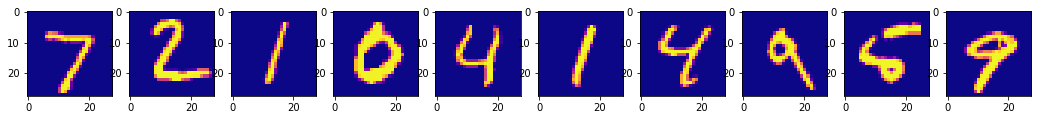

ENCODED IMAGE


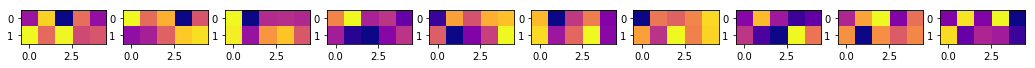

DECODED IMAGE


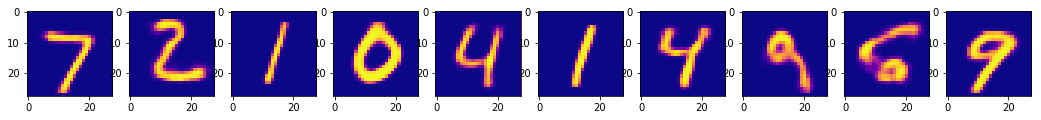

In [23]:
encoded_imgs = encoder.predict(test_imgs)
decoded_imgs = autoencoder.predict(test_imgs)

print('ORIGINAL IMAGE')
plt.figure(figsize=(18, 4))
for i in range(10):
    # plot original image
    ax = plt.subplot(1, 10,i+1)
    plt.imshow(test_imgs[i].reshape(28, 28),cmap='plasma')
plt.show()


print('ENCODED IMAGE')
plt.figure(figsize=(18, 4))
for i in range(10):
    # plot encoded image
    ax = plt.subplot(1, 10,i + 1)
    plt.imshow(encoded_imgs[i].reshape(2, 5),cmap='plasma')
plt.show()


print('DECODED IMAGE')
plt.figure(figsize=(18, 4))
for i in range(10):
    # plot reconstructed image
    ax = plt.subplot(1, 10,i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28),cmap='plasma')
plt.show()

# LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(train_imgs, train_labels)
print('PREDICTED OUTPUT:',clf.predict(decoded_imgs[:10]))
print('ACTUAL OUTPUT:',*test_labels[:10])
print('ACCURACY:',clf.score(decoded_imgs,test_labels))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PREDICTED OUTPUT: [7. 2. 1. 0. 4. 1. 4. 9. 6. 9.]
ACTUAL OUTPUT: [7.] [2.] [1.] [0.] [4.] [1.] [4.] [9.] [5.] [9.]
ACCURACY: 0.9352


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
